# Simulaciones con el método de Monte Carlo Frecuentista y de variación mínima.

* Salette Guadalupe Noemi Villalobos - *A01246619*
* Samuel Méndez Villegas - *A01652277*
* Ethan Enrique Verduzco Pérez - *A01066955*
* Jesús Alejandro Marroquín Escobedo - *A00827670*
* Brenda Guadalupe Martínez Orta - *A01570565*


## Librerías a utilizar

In [ ]:
## Librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics 
import math

## Lectura de la base de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Optimización Estocástica/Datos_aseguradoraOrdenados.csv',encoding= 'latin-1')
df

,Fecha del Siniestro,Tipo de auto,Modelo,Monto del siniestro,Aplica cobertura,Deducible,Reclamo de Cobertura,Pérdida total
0,01/01/20,Camioneta,2018,93750,Si,7500.0,No,No
1,01/01/20,Austero,2016,2580,Si,1000.0,No,No
2,01/01/20,Subcompacto,2017,18040,Si,2600.0,No,No
3,01/01/20,Subcompacto,2017,18760,Si,2000.0,No,No
4,01/01/20,Austero,2017,2640,Si,1600.0,No,No
...,...,...,...,...,...,...,...,...
27116,30/12/20,Camioneta,2017,50380,Si,8800.0,No,No
27117,30/12/20,Austero,2016,5170,Si,1400.0,No,No
27118,30/12/20,Subcompacto,2017,14640,Si,2600.0,No,No
27119,30/12/20,Austero,2018,2980,Si,1000.0,No,No


## Información de las variables

In [ ]:
## Descripción General de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27121 entries, 0 to 27120
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fecha del Siniestro   27121 non-null  object 
 1   Tipo de auto          27098 non-null  object 
 2   Modelo                27121 non-null  int64  
 3   Monto del siniestro   27121 non-null  int64  
 4   Aplica cobertura      27121 non-null  object 
 5   Deducible             27082 non-null  float64
 6   Reclamo de Cobertura  27121 non-null  object 
 7   Pérdida total         27121 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.7+ MB


In [ ]:
## Datos nulos
df.isnull().sum()

Fecha del Siniestro      0
Tipo de auto            23
Modelo                   0
Monto del siniestro      0
Aplica cobertura         0
Deducible               39
Reclamo de Cobertura     0
Pérdida total            0
dtype: int64

In [ ]:
df['Reclamo de Cobertura'].value_counts()

No                            25804
Si                             1294
If["" > 10000, "Si", "No"]        6
If["" > 30000, "Si", "No"]        5
If["" > 20000, "Si", "No"]        4
If["" > 0, "Si", "No"]            3
If["" > 50000, "Si", "No"]        3
If["" > 40000, "Si", "No"]        2
Name: Reclamo de Cobertura, dtype: int64

# Obtención de los parámetros estimados $\lambda$ y $\mu$

## Base de datos con la que se trabajará

In [ ]:
import copy
df_reclamos = df.copy()
df_reclamos

,Fecha del Siniestro,Tipo de auto,Modelo,Monto del siniestro,Aplica cobertura,Deducible,Reclamo de Cobertura,Pérdida total
0,01/01/20,Camioneta,2018,93750,Si,7500.0,No,No
1,01/01/20,Austero,2016,2580,Si,1000.0,No,No
2,01/01/20,Subcompacto,2017,18040,Si,2600.0,No,No
3,01/01/20,Subcompacto,2017,18760,Si,2000.0,No,No
4,01/01/20,Austero,2017,2640,Si,1600.0,No,No
...,...,...,...,...,...,...,...,...
27116,30/12/20,Camioneta,2017,50380,Si,8800.0,No,No
27117,30/12/20,Austero,2016,5170,Si,1400.0,No,No
27118,30/12/20,Subcompacto,2017,14640,Si,2600.0,No,No
27119,30/12/20,Austero,2018,2980,Si,1000.0,No,No


## Obtención del valor de $\lambda$ (promedio de número de siniestros por día N(t))

In [ ]:
## Número de siniestros por día
df_reclamos['Fecha del Siniestro'].value_counts()

02/08/20    101
28/09/20    100
31/05/20     97
18/12/20     97
05/08/20     96
           ... 
11/10/20     54
03/12/20     54
02/07/20     53
03/08/20     52
22/08/20     50
Name: Fecha del Siniestro, Length: 365, dtype: int64

In [ ]:
## Diccionario de fecha - número de sinistros en esa fecha

num_siniestros = {}
iteracion = 0

for i in df_reclamos['Fecha del Siniestro']:
    if i not in num_siniestros:
        num_siniestros[i] = 1
    else:
        num_siniestros[i] += 1
num_siniestros

{'01/01/20': 88,
 '01/02/20': 76,
 '01/03/20': 79,
 '01/04/20': 87,
 '01/05/20': 84,
 '01/06/20': 65,
 '01/07/20': 75,
 '01/08/20': 70,
 '01/09/20': 74,
 '01/10/20': 75,
 '01/11/20': 87,
 '01/12/20': 82,
 '02/01/20': 73,
 '02/02/20': 69,
 '02/03/20': 71,
 '02/04/20': 85,
 '02/05/20': 75,
 '02/06/20': 69,
 '02/07/20': 53,
 '02/08/20': 101,
 '02/09/20': 77,
 '02/10/20': 79,
 '02/11/20': 81,
 '02/12/20': 83,
 '03/01/20': 68,
 '03/02/20': 74,
 '03/03/20': 69,
 '03/04/20': 71,
 '03/05/20': 79,
 '03/06/20': 73,
 '03/07/20': 73,
 '03/08/20': 52,
 '03/09/20': 73,
 '03/10/20': 68,
 '03/11/20': 66,
 '03/12/20': 54,
 '04/01/20': 79,
 '04/02/20': 78,
 '04/03/20': 92,
 '04/04/20': 84,
 '04/05/20': 94,
 '04/06/20': 62,
 '04/07/20': 85,
 '04/08/20': 74,
 '04/09/20': 70,
 '04/10/20': 62,
 '04/11/20': 66,
 '04/12/20': 70,
 '05/01/20': 82,
 '05/02/20': 79,
 '05/03/20': 79,
 '05/04/20': 79,
 '05/05/20': 72,
 '05/06/20': 85,
 '05/07/20': 73,
 '05/08/20': 96,
 '05/09/20': 74,
 '05/10/20': 63,
 '05/11/20': 

In [ ]:
lambdaa = sum(num_siniestros.values())/365
lambdaa

74.30410958904109

## Prueba de bondad de ajuste Poisson

H0: Los conteos siguen una distribución de Poisson.

H1: Los conteos no siguen una distribución de Poisson.

Nivel de Significancia: 0.05

In [ ]:
from numpy.random import seed
from numpy.random import poisson
from numpy.random import exponential
from scipy.stats import kstest, ks_2samp

In [ ]:
distribucion_muestra_1 = np.asarray(df_reclamos['Fecha del Siniestro'].value_counts())
estadistico, valor_p = ks_2samp(distribucion_muestra_1, poisson(lambdaa, len(num_siniestros)))

if valor_p > 0.05:
  print("La distribución de los conteos SÍ se ajusta a Poissson, pues se obtuvo un p-value de:", valor_p)
else:
  print("La distribución de los conteos NO se ajusta a Poissson, pues se obtuvo un p-value de:", valor_p)

La distribución de los conteos SÍ se ajusta a Poissson, pues se obtuvo un p-value de: 0.8751229287319374


## Cálculo de $\mu$ (promedio del tamaño de los siniestros)

In [ ]:
mu = df_reclamos['Monto del siniestro'].mean()
mu

30771.375686737214

## Prueba de bondad de ajuste Exponencial

H0: Los reclamos siguen una distribución de Exponencial.

H1: Los reclamos no siguen una distribución de Exponencial.

Nivel de Significancia: 0.05

In [ ]:
seed(1)
distribucion_exponencial = exponential(mu, df_reclamos['Monto del siniestro'].size)
distribucion_muestra_2 = np.asarray(df_reclamos['Monto del siniestro'])
estdistico, valor_p = ks_2samp( distribucion_muestra_2, distribucion_exponencial)

if valor_p > 0.05:
  print("La distribución del monto de los reclamos SÍ se ajusta a la exponencial, pues se obtuvo un p-value de:", valor_p)
else:
  print("La distribución del monto de los reclamos NO se ajusta a la exponencial, pues se obtuvo un p-value de:", valor_p)

La distribución del monto de los reclamos SÍ se ajusta a la exponencial, pues se obtuvo un p-value de: 0.5888491556547271


# Intervalos de confianza para los parámetros $\lambda$ y $\mu$

## Intervalo de confianza para $\lambda$

$$
\hat{\lambda}-z_{\alpha/2}\sqrt{\frac{\hat{\lambda}}{n}} \leq \lambda \leq \hat{\lambda}+z_{\alpha/2}\sqrt{\frac{\hat{\lambda}}{n}}
$$


In [ ]:
import math
## Intervalo de confianza del 95%
## alpha = 0.05

n = 365
lam_gorro = lambdaa
z = 1.96 ## Valor obtenido de la tabla de distribución Z

limite_inferior = lam_gorro - z*math.sqrt(lam_gorro/n)
limite_superior = lam_gorro + z*math.sqrt(lam_gorro/n)

texto = "El intervalo de confianza para el parámetro lambda es de: "\
        + str(limite_inferior) + ' <= lambda <= ' + str(limite_superior)

print(texto)

El intervalo de confianza para el parámetro lambda es de: 73.41977613151386 <= lambda <= 75.18844304656832


## Intervalo de confianza para $\mu$

$$
\frac{2n}{\hat{\lambda}\chi_{1-\frac{\alpha}{2}, 2n}^{2}} < \frac{1}{\lambda} < \frac{2n}{\hat{\lambda}\chi_{\frac{\alpha}{2}, 2n}^{2}}
$$

In [ ]:
## Intervalo de confianza del 95%
## alpha = 1- 0.95 = 0.05

n = len(df_reclamos)
lam_gorro = mu
#chi_inferior = 
#chi_superior = 

#limite_inferior = (2*n)/(lam_gorro * chi_inferior)
#limite_superior = (2*n)/(lam_gorro * chi_superior)

limite_inferior = lam_gorro * (1- 1.96/math.sqrt(n))
limite_superior = lam_gorro * (1+ 1.96/math.sqrt(n))

texto = "El intervalo de confianza para el parámetro lambda es de: "\
        + str(limite_inferior) + ' <= 1/lambda <= ' + str(limite_superior)

print(texto)
print(n)

El intervalo de confianza para el parámetro lambda es de: 30405.148876343737 <= 1/lambda <= 31137.602497130694
27121


# Monte Carlo frecuentista

In [ ]:
mu*lambdaa*1.1

2515083.638356164

In [ ]:
u = float(input('Capital inicial de la aseguradora: ')) 
c = float(input('Primas por unidad de tiempo: '))        
t = np.arange(365) 
lamb = lambdaa
miu = mu 

Capital inicial de la aseguradora: 0
Primas por unidad de tiempo: 2515083.638356164


In [ ]:
def obtener_reclamos():
  n_siniestros_dia = poisson(lamb, 365) 
  reclamos_dia = [sum(exponential(miu, x)) for x in n_siniestros_dia]
  return reclamos_dia


def calculo_xt():
  reclamos_dia = obtener_reclamos()
  trayectoria = []
  reclamo_acumulado = 0

  for t in range(1, 366):
    reclamo_acumulado += reclamos_dia[t-1]

    x_i = u + c * t - reclamo_acumulado
    trayectoria.append(x_i)

    if x_i <= 0:

      return trayectoria, t

  return trayectoria, -1

In [ ]:
def realizar_simulaciones():

  trayectorias_totales = []
  quiebra = 0
  probabilidad = 0 
  probabilidades = [] 

  for simulaciones in range(1,10001):
    trayectoria, resultado = calculo_xt()
    trayectorias_totales.append(trayectoria)

    if resultado != -1:
      quiebra += 1
      probabilidad = quiebra / simulaciones
      probabilidades.append(probabilidad)
    
    else:
      probabilidad = quiebra / simulaciones
      probabilidades.append(probabilidad)


  return probabilidades, quiebra


In [ ]:
probabilidades_frecuentistas, quiebra = realizar_simulaciones()
print('El valor de la probabilidad con un capital inicial ' + str(u) + ' es de:', probabilidades_frecuentistas[-1])

El valor de la probabilidad con un capital inicial 0.0 es de: 0.3893


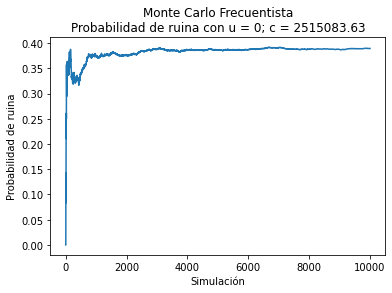

In [ ]:
import matplotlib.pyplot as plt

plt.plot(probabilidades_frecuentistas)
plt.title('Monte Carlo Frecuentista\nProbabilidad de ruina con u = 0; c = 2515083.63')
plt.xlabel('Simulación')
plt.ylabel('Probabilidad de ruina')
plt.show()

In [ ]:
# capital inicial de 30,000
u = float(input('Capital inicial de la aseguradora: ')) 
c = float(input('Primas por unidad de tiempo: '))     
probabilidades_frecuentistas2, quiebra2 = realizar_simulaciones()
print('El valor de la probabilidad con un capital inicial ' + str(u) + ' es de:', probabilidades_frecuentistas2[-1])

Capital inicial de la aseguradora: 30000
Primas por unidad de tiempo: 2515083.638356164
El valor de la probabilidad con un capital inicial 30000.0 es de: 0.3625


In [ ]:
# capital inicial de 300,000
u = float(input('Capital inicial de la aseguradora: ')) 
c = float(input('Primas por unidad de tiempo: '))
probabilidades_frecuentistas3, quiebra3 = realizar_simulaciones()
print('El valor de la probabilidad con un capital inicial ' + str(u) + ' es de:', probabilidades_frecuentistas2[-1])

Capital inicial de la aseguradora: 300000
Primas por unidad de tiempo: 2515083.638356164
El valor de la probabilidad con un capital inicial 300000.0 es de: 0.1829


In [ ]:
# capital inicial de 1,000,000
u = float(input('Capital inicial de la aseguradora: ')) 
c = float(input('Primas por unidad de tiempo: '))
probabilidades_frecuentistas4, quiebra4 = realizar_simulaciones()
print('El valor de la probabilidad con un capital inicial ' + str(u) + ' es de:', probabilidades_frecuentistas2[-1])

Capital inicial de la aseguradora: 1000000
Primas por unidad de tiempo: 2515083.638356164
El valor de la probabilidad con un capital inicial 1000000.0 es de: 0.1829


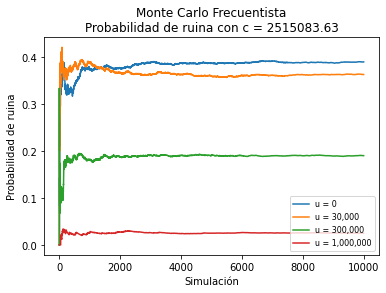

In [ ]:
plt.plot(probabilidades_frecuentistas, label = 'u = 0')
plt.plot(probabilidades_frecuentistas2, label = 'u = 30,000')
plt.plot(probabilidades_frecuentistas3, label = 'u = 300,000')
plt.plot(probabilidades_frecuentistas4, label = 'u = 1,000,000')

plt.title('Monte Carlo Frecuentista\nProbabilidad de ruina con c = 2515083.63')
plt.xlabel('Simulación')
plt.ylabel('Probabilidad de ruina')
plt.legend(loc=4, prop={'size': 8})
plt.show()

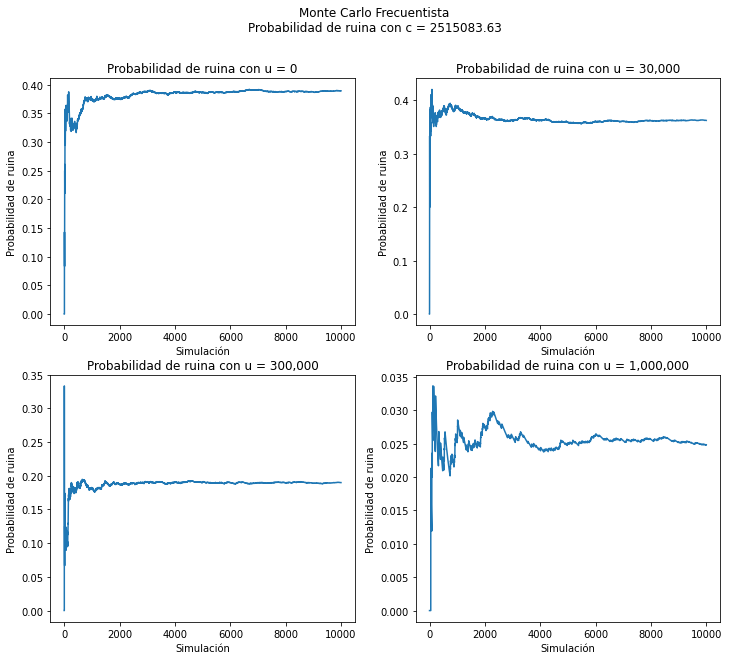

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(2, 2, 1)
plt.plot(probabilidades_frecuentistas, label = 'u = 0')
plt.title('Probabilidad de ruina con u = 0')
plt.ylabel('Probabilidad de ruina')
plt.xlabel('Simulación')

plt.subplot(2, 2, 2)
plt.plot(probabilidades_frecuentistas2, label = 'u = 30,000')
plt.title('Probabilidad de ruina con u = 30,000')
plt.ylabel('Probabilidad de ruina')
plt.xlabel('Simulación')

plt.subplot(2, 2, 3)
plt.plot(probabilidades_frecuentistas3, label = 'u = 300,000')
plt.title('Probabilidad de ruina con u = 300,000')
plt.ylabel('Probabilidad de ruina')
plt.xlabel('Simulación')

plt.subplot(2, 2, 4)
plt.plot(probabilidades_frecuentistas4, label = 'u = 1,000,000')
plt.title('Probabilidad de ruina con u = 1,000,000')
plt.ylabel('Probabilidad de ruina')
plt.xlabel('Simulación')

plt.suptitle("Monte Carlo Frecuentista\nProbabilidad de ruina con c = 2515083.63")
plt.show()

# Monte Carlo *r* simulaciones

In [ ]:
from scipy.stats import norm
from scipy import stats

z_95 = norm.ppf(.975) #alpha igual a 0.05, alpha/2 = 0.025}
e = 0.0001
valor_deseado = e / z_95

alpha= 0.05  
ci = [valor_deseado-valor_deseado*alpha, valor_deseado+valor_deseado*alpha]
valor_deseado = round(valor_deseado, 6)
valor_deseado


5.1e-05

In [ ]:
intervalo = [round(valor_deseado-0.01*valor_deseado, 6), round(valor_deseado+0.01*valor_deseado, 6)]
intervalo

[5e-05, 5.2e-05]

In [ ]:
def r_simulaciones(intervalo_deseado):

  trayectorias_totales = []
  quiebra = 0
  probabilidad = 0 
  probabilidades = [] 
  simulaciones = 0

  while True:

    simulaciones += 1

    trayectoria, resultado = calculo_xt()
    trayectorias_totales.append(trayectoria)

    if resultado != -1:

      quiebra += 1
      probabilidad = quiebra / simulaciones
      probabilidades.append(probabilidad)
    
    else:

      probabilidad = quiebra / simulaciones
      probabilidades.append(probabilidad)

    
    a = (probabilidad*(1-probabilidad))/simulaciones
    a = round(a, 6)

    if intervalo_deseado[0] <= a and a <= intervalo_deseado[1]:
      print("El número de simulaciones fue de", simulaciones)
      print("El valor es", probabilidad)
      break

  return probabilidades

In [ ]:
# r simulaciones con u = 0
u = float(input('Capital inicial de la aseguradora: ')) 
c = float(input('Primas por unidad de tiempo: '))   
probabilidades_r_simulaciones = r_simulaciones(intervalo)

Capital inicial de la aseguradora: 0
Primas por unidad de tiempo: 2515083.638356164
El número de simulaciones fue de 4496
El valor es 0.3816725978647687


In [ ]:
# r simulaciones con u = 30,000
u = float(input('Capital inicial de la aseguradora: ')) 
c = float(input('Primas por unidad de tiempo: '))  
probabilidades_r_simulaciones2 = r_simulaciones(intervalo)

Capital inicial de la aseguradora: 30000
Primas por unidad de tiempo: 2515083.638356164
El número de simulaciones fue de 4402
El valor es 0.362335302135393


In [ ]:
# r simulaciones con u = 300,000
u = float(input('Capital inicial de la aseguradora: ')) 
c = float(input('Primas por unidad de tiempo: '))  
probabilidades_r_simulaciones3 = r_simulaciones(intervalo)

Capital inicial de la aseguradora: 300000
Primas por unidad de tiempo: 2515083.638356164
El número de simulaciones fue de 2822
El valor es 0.18072289156626506


In [ ]:
# r simulaciones con u = 1,000,000
u = float(input('Capital inicial de la aseguradora: ')) 
c = float(input('Primas por unidad de tiempo: '))  
probabilidades_r_simulaciones4 = r_simulaciones(intervalo)

Capital inicial de la aseguradora: 1000000
Primas por unidad de tiempo: 2515083.638356164
El número de simulaciones fue de 410
El valor es 0.02195121951219512


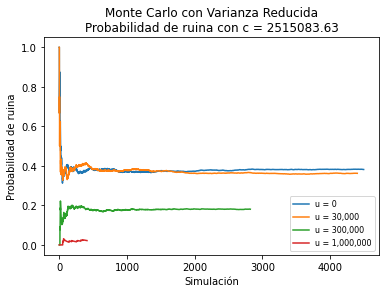

In [ ]:
plt.plot(probabilidades_r_simulaciones, label = 'u = 0')
plt.plot(probabilidades_r_simulaciones2, label = 'u = 30,000')
plt.plot(probabilidades_r_simulaciones3, label = 'u = 300,000')
plt.plot(probabilidades_r_simulaciones4, label = 'u = 1,000,000')

plt.title('Monte Carlo con Varianza Reducida\nProbabilidad de ruina con c = 2515083.63')
plt.xlabel('Simulación')
plt.ylabel('Probabilidad de ruina')
plt.legend(loc=4, prop={'size': 8})
plt.show()

# Teorema central del límite

In [ ]:
from random import choice

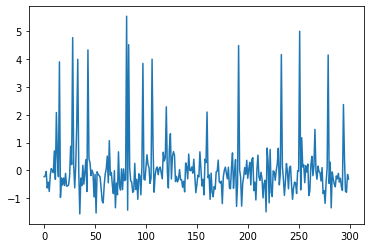

In [ ]:
n = 300
r = []
mul = sum(probabilidades_frecuentistas) / len(probabilidades_frecuentistas)
for i in range(300):
    a=[choice(probabilidades_frecuentistas) for x in range(n)]
    mean = sum(a) / n
    Zn = math.sqrt(n)*((mean - mul)/statistics.stdev(probabilidades_frecuentistas))
    r.append(Zn)
t = np.arange(300)
plt.plot(t, r)
plt.show()

# De Vylder

In [ ]:
u = float(input('Capital inicial de la aseguradora: ')) 
c = 1.1 * lambdaa * mu       
t = np.arange(365) 
lamb = lambdaa
miu = mu 

Capital inicial de la aseguradora: 300000


In [ ]:
def obtener_reclamos():
  n_siniestros_dia = poisson(lamb, 365) 
  reclamos_dia = [sum(exponential(miu, x)) for x in n_siniestros_dia]
  return reclamos_dia, n_siniestros_dia

def calculo_xt():
  reclamos_dia, n_siniestros_dia = obtener_reclamos()
  trayectoria = []
  reclamo_acumulado = 0

  for t in range(1, 366):
    reclamo_acumulado += reclamos_dia[t-1]

    x_i = u + c * t - reclamo_acumulado
    trayectoria.append(x_i)

  return trayectoria, reclamos_dia, n_siniestros_dia

In [ ]:
def vylder_simulaciones():

  trayectorias_totales = []
  quiebra = 0
  probabilidad = 0 
  probabilidades = [] 
  simulaciones = 0
  miu2 = []
  miu3 = []

  for simulaciones in range(1,1001):                            

    simulaciones += 1

    trayectoria, reclamos, n_siniestros_dia = calculo_xt()   

    media_miu = statistics.mean(reclamos / n_siniestros_dia) 
    miu2.append(media_miu**2)
    miu3.append(media_miu**3)

    trayectorias_totales.append(trayectoria)

    media_miu2 = statistics.mean(miu2)
    media_miu3 = statistics.mean(miu3)

    alpha_estimado = 3 * media_miu2 / media_miu3
    lambda_estimado = (9/2)*(lamb)*((media_miu2**3)/(media_miu3**2))
    c_estimado = c - (lamb*miu) + ((3/2)*(lamb)*((media_miu2**2)/(media_miu3)))
    
    R = alpha_estimado - (lambda_estimado / c_estimado)

    probabilidad = (lamb * (miu))/c * math.exp(-u * R)
    probabilidades.append(probabilidad)

  return probabilidades

In [ ]:
probabilidades_vylder_simulaciones = vylder_simulaciones()

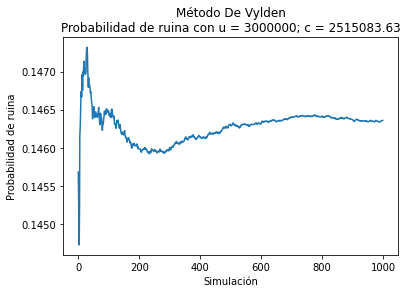

In [ ]:
plt.plot(probabilidades_vylder_simulaciones)
plt.title('Método De Vylden\nProbabilidad de ruina con u = 3000000; c = 2515083.63')
plt.xlabel('Simulación')
plt.ylabel('Probabilidad de ruina')
plt.show()

In [ ]:
probabilidades_vylder_simulaciones[-1]

0.14635951416077542

# Pollaczek-Khinchin

In [ ]:
u = float(input('Capital inicial de la aseguradora: ')) 
c = 1.1 * lambdaa * mu       
t = np.arange(365) 
lamb = lambdaa
miu = mu 

Capital inicial de la aseguradora: 0


In [ ]:
beta = 1/mu

In [ ]:
(lamb/(beta*c))*math.e**(-(beta-(lamb/c))*u)

0.909090909090909

In [ ]:
valores_u = np.arange(0,1000000)


In [ ]:
def elPollas():
  valores_u = np.arange(0,1000000)
  probabilidades_polla = []

  for u in valores_u:
    prob_polla = (lamb/(beta*c))*math.e**(-(beta-(lamb/c))*u)
    probabilidades_polla.append(prob_polla)

  return probabilidades_polla    


In [ ]:
aproximaciones_pollaczek = elPollas()

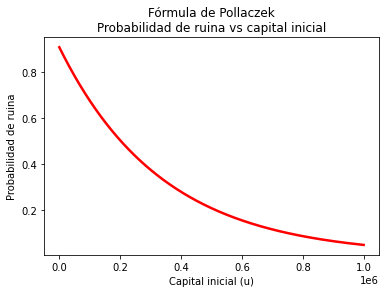

In [ ]:
plt.plot(aproximaciones_pollaczek, linewidth = 2.5, color = 'red')
plt.xlabel('Capital inicial (u)')
plt.ylabel('Probabilidad de ruina')
plt.title('Fórmula de Pollaczek\nProbabilidad de ruina vs capital inicial')
plt.show()